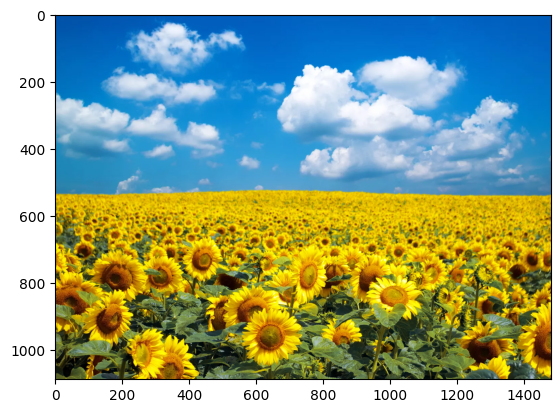

In [113]:
# Image Pipeline

import cv2
import numpy as np
import matplotlib.pyplot as plt

#Import image
img = cv2.imread('Input.png')

img = cv2.cvtColor(img,cv2.COLOR_BGR2RGB)

plt.imshow(img)

In [114]:
# Import Libraries
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [115]:
def rgb_to_hsv(rgb):
  ## Input: rgb is an 3-D array with values in range [0,255].
  # r = rgb[0][0][0], b = rgb[0][0][1], g = rgb[0][0][2]
  # Output: hsv is an 1-D array [h,s,v] with values in range h = [0,180], s = [0,255], v = [0,255].
  # Normalize color values. Convert to floating point values between 0 - 1
    rgb=np.array(rgb)/255
    
    # Initialize HSV
    h = 0.0
    s = 0.0
    v = 0.0
    # to find the max and min RGB values and set the V 
    v = np.max(rgb)
    vMin = np.min(rgb)
    # Set the saturation value.
    if(v>0.0):
      s = (v - vMin)/v
    else:
      s = 0.0
    # Calculate (v - vMin) convenience
    diff = (v - vMin)
    # Compute the hue by the relative sizes of the RGB components

    # Are r,g,b equal.
    if(rgb[0][0][0] == rgb[0][0][1] and rgb[0][0][1] == rgb[0][0][2]):
      h = 0
    # Is the point within +/- 60 degrees of the red axis
    elif(rgb[0][0][0] == v):
      h = 60 * (rgb[0][0][1] - rgb[0][0][2]) / diff
    # Is the point within +/- 60 degrees of the green axis
    elif(rgb[0][0][1] == v):
      h = 120 + 60 * (rgb[0][0][2] - rgb[0][0][0]) / diff
    # IS the point within +/- 60 degrees of the blue axis
    elif(rgb[0][0][2] == v):
      h = 240 + 60 * (rgb[0][0][0] - rgb[0][0][1]) / diff

    h=round(h/2)
    #Normalize color values. Convert to floating point values between 0 - 255
    s = round(np.interp(s,[0,1],[0,255]))
    v = round(np.interp(v,[0,1],[0,255]))
    return np.array([[[h,s,v]]])

In [116]:
def rgb_to_hsv_func(img):
    #Saving height and width
    h = img.shape[0]
    w = img.shape[1]
    d = img.shape[2]

    #Creating an empty array as image shape
    imgHSV = np.zeros((h,w,d), dtype=np.uint8)

    #For each row in our grid.
    for y in range(0,h):
        #Search each pixel in the row
        for x in range(0,w):
            rgb=[[img[y][x]]]
            imgHSV[y][x]=rgb_to_hsv(rgb)
    return imgHSV

In [117]:
def bgr_to_rgb_func(img):
    #Saving height and width
    h = img.shape[0]
    w = img.shape[1]
    d = img.shape[2]
    
    #Creating an empty array as image shape
    imgRGB = np.zeros((h,w,d), dtype=np.uint8)
    #For each row in our grid.
    for y in range(0,h):
        #Search each pixel in the row
        for x in range(0,w):
            imgRGB[y][x][0]=img[y][x][2]
            imgRGB[y][x][1]=img[y][x][1]
            imgRGB[y][x][2]=img[y][x][0]
    return imgRGB

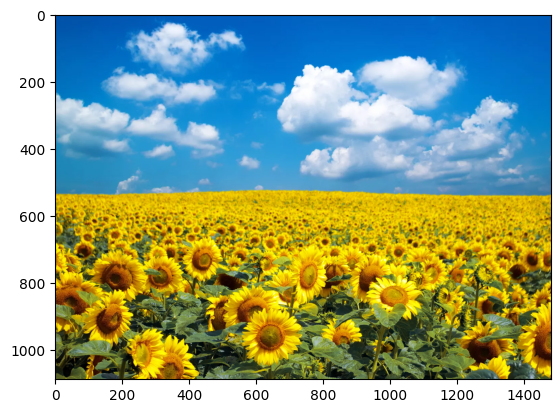

In [118]:
img = cv2.imread('Input.png', 1)
img = bgr_to_rgb_func(img)
plt.imshow(img)

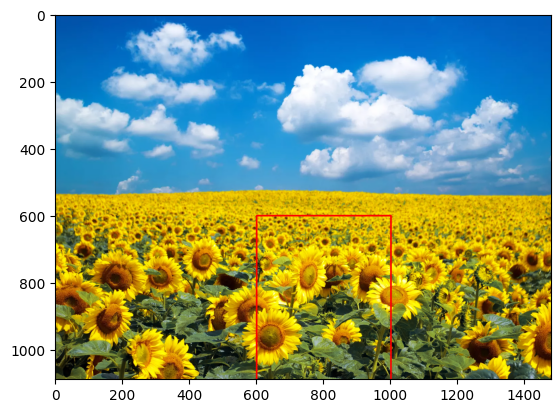

In [119]:
#Create masks and bounding boxes on the image

#cv2.rectangle(img,top_left, bottom_right, rect_color, thickness)

#Top_left
top_left = (600,600)

#Bottom Right
bottom_right = (1000,1400)

#rectangle color
rect_color = (255,0,0)

#thickness
thickness = 3

# Rectangle function
img_rect = cv2.rectangle(img, top_left, bottom_right, rect_color, thickness)
# Plot image
plt.imshow(img_rect)

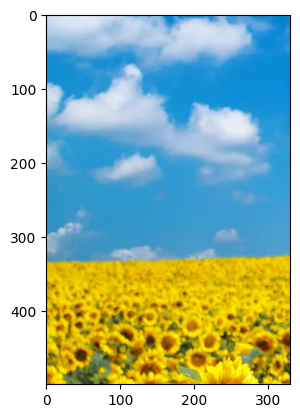

In [120]:
img_masked = img[200:700,200:530] 
plt.imshow(img_masked)

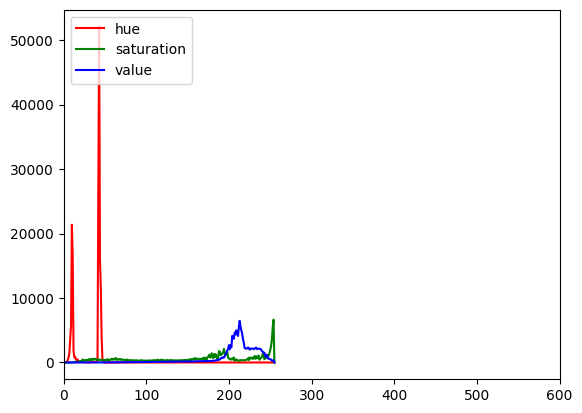

In [121]:
# Create a histogram of HSV values.
img_masked = cv2.cvtColor(img_masked, cv2.COLOR_RGB2HSV)
# Hue
hist = cv2.calcHist([img_masked],[0],None,[256],[0,600])
# Add histogram to the plot.
plt.plot(hist, color='red')
# Limit the plot range on the x-axis to 256 values.
plt.xlim([0,600])
# Saturation
hist = cv2.calcHist([img_masked],[1],None,[256],[0,255])
# Add histogram to the plot.
plt.plot(hist, color='green')
# Limit the plot range on the x-axis to 256 values.
plt.xlim([0,600])
# Value
hist = cv2.calcHist([img_masked],[2],None,[256],[0,255])
# Add histogram to the plot.
plt.plot(hist, color='blue')
# Limit the plot range on the x-axis to 256 values.
plt.xlim([0,600])
# Add a legend
plt.legend(('hue','saturation','value'), loc = 'upper left')
# Plot a histogram.
plt.show()

In [122]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
img = cv2.imread('Input.png')
#Create an empty 2D array filled with zeros the same shape as our image. Notice
mask = np.zeros(img.shape[:2], np.uint8)
# Set the masked to white. Remember black is 0 and white is 255 is 8 bit color.
mask[50:700,50:530] = 255
# Image shape to confirm it's the same size as our image.
print(mask.shape)

(1087, 1480)


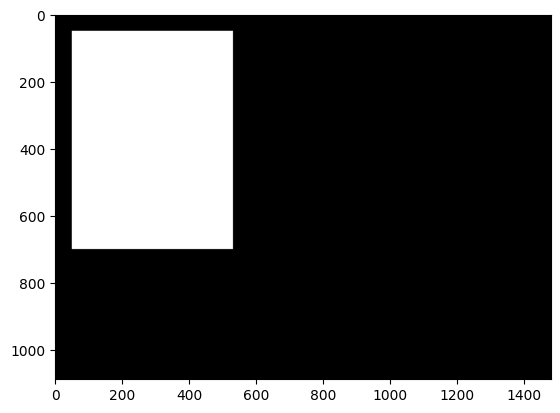

In [123]:
plt.imshow(mask, cmap="gray")

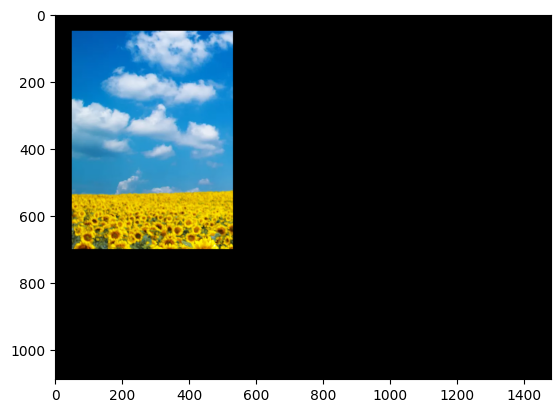

In [124]:
# Let's add our mask to our image.
# Import the face image again.
img = cv2.imread("Input.png")
# Convert our image to RGB so we can plot it.
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
# The bitwise AND operator ( & ) compares each bit of the first operand to the c
# If both bits are 1, the corresponding result bit is set to 1. Otherwise, the c
# First image to compare. Second image to compare. Mask to use.
img_masked = cv2.bitwise_and(img, img, mask=mask)
# Plot the masked image.
plt.imshow(img_masked)